Let's load a couple of python packages. 

To run these examples at home, you can either use Colab or set up your own [jupyter notebooks](https://jupyter.org/install.html)

In [56]:
from copy import deepcopy
from enum import Enum
from typing import List, Tuple, Dict
import graphviz

We made a simple maze environment, where you can move vertically / horizontally and collect gold items. Your current position is denoted with a `@` symbol. Let's go briefly over the implementation to see what it does.

In [57]:
class Action(Enum):
  MOVE_UP = "u"
  MOVE_LEFT = "l"
  MOVE_RIGHT = "r"
  MOVE_DOWN = "d"

class Maze:
  def __init__(self, maze_rows: List[str]):
    # Let's save a 2D array of chars.
    self._maze = [list(row) for row in maze_rows]  
    # Make sure the maze has a rectangular shape, and has a proper boundary.
    assert all(len(row) == self.num_cols() for row in self._maze)
    assert set(self._maze[0]) == {"#"} and set(self._maze[-1]) == {"#"}
    assert all(row[0] == "#" and row[-1] == "#" for row in self._maze)

  def num_rows(self):
    return len(self._maze)

  def num_cols(self):
    return len(self._maze[0])

  def current_position(self) -> Tuple[int, int]:
    # Find current position: it is denoted using an @ sign.
    for i in range(self.num_rows()):
      for j in range(self.num_cols()):
        if self._maze[i][j] == "@":
          return i, j
    raise RuntimeError("Invalid maze: current position not found in: " +
                       "\n".join(self._maze))

  def apply(self, action: Action):
    i, j = self.current_position()

    # Maze rows is a List, this makes a reference in Python, not a copy.
    m = self._maze

    # These bound checks work because we made sure that the whole maze is
    # delimited with char #   -- otherwise we would have to make much more
    # complicated if statements! This is a common implementation trick, used
    # for example in high performing chess engines.

    if action == Action.MOVE_UP and m[i - 1][j] != "#":
      m[i][j], m[i - 1][j] = " ", m[i][j]
    elif action == Action.MOVE_DOWN and m[i + 1][j] != "#":
      m[i][j], m[i + 1][j] = " ", m[i][j]
    elif action == Action.MOVE_LEFT and m[i][j - 1] != "#":
      m[i][j], m[i][j - 1] = " ", m[i][j]
    elif action == Action.MOVE_RIGHT and m[i][j + 1] != "#":
      m[i][j], m[i][j + 1] = " ", m[i][j]

  def captures_gold(self, action: Action):
    i, j = self.current_position()
    m = self._maze
    return ((action == Action.MOVE_UP    and m[i - 1][j] == "G")
         or (action == Action.MOVE_DOWN  and m[i + 1][j] == "G")
         or (action == Action.MOVE_LEFT  and m[i][j - 1] == "G")
         or (action == Action.MOVE_RIGHT and m[i][j + 1] == "G"))

  def has_any_gold(self):
    for i in range(self.num_rows()):
      for j in range(self.num_cols()):
        if self._maze[i][j] == "G":
          return True
    return False

  def __str__(self):
    return "\n".join(["".join(row) for row in self._maze])

  def __repr__(self):
    return str(self)

  def __eq__(self, other):
    return self._maze == other._maze

  def __hash__(self):
    return hash(str(self))

  def clone(self):
    return Maze(deepcopy(self._maze))


Let's make the simplest valid maze example.

In [58]:
maze0 = Maze(["###",
              "#@#",
              "###"])
maze0

###
#@#
###

Let's try to move.


In [59]:
maze0.apply(Action.MOVE_DOWN)
maze0

###
#@#
###

Nothing happens. It'a a boring maze after all :)

Let's make a number of more complicated mazes.


In [60]:
maze1 = Maze(["####",
              "#@G#",
              "####"])
maze2 = Maze(["#####",
              "#  G#",
              "# # #",
              "#@  #",
              "#####"])

Task 0: Apply appropriate actions to make your character to fetch the gold  for both mazes.

!! Now beware that the `.apply()` function **changes** the maze, so if we want to keep the original, we need to clone (copy) it. !!


In [61]:
# Write appropriate sequence of apply() 

Task 1: Write BFS traversal to fetch the gold. Return a list of actions which need to be followed from the initial maze.

Hint: use `captures_gold(action)` to know when to terminate search.

In [62]:
def find_some_gold_bfs(init_maze: Maze) -> List[Action]:
  # Implement this method.
  pass

Task 2: Write DFS traversal to fetch the gold. Return a list of actions which need to be followed from the initial maze.

In [63]:
def find_some_gold_dfs(init_maze: Maze) -> List[Action]:
  # Implement this method.
  pass

Let's make a more complicated maze:

In [64]:
maze3 = Maze(["########",
              "#  G#G #",
              "# # ## #",
              "#@  G  #",
              "########"])

Task 3. Use your previous implementations to collect all the golds. 

Hint: use `maze.has_any_gold()` to terminate the collection loop.

In [65]:
def collect_all_golds(init_maze: Maze) -> List[Action]:
  # Implement this method.
  pass

Task 4. Generate all possible mazes and transitions between them.


In [66]:
def maze_transitions(init_maze: Maze) -> List[Tuple[Maze, Action, Maze]]:
  # Implementh this method.
  pass

---

Graphviz is a very nice library for visualizing graphs. It has a simple and intuitive syntax. Like this:

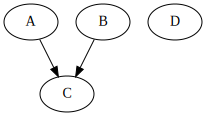

In [67]:
graph = graphviz.Digraph()
graph.edge("A", "C")
graph.edge("B", "C")
graph.node("D")
graph

It actually creates a string in a DOT language that you can use for rendering or creating layouts of the graph.

In [68]:
print(graph.source)

digraph {
	A -> C
	B -> C
	D
}


You can create also multi-graphs and pass style attributes:

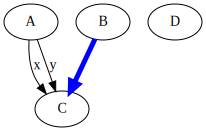

In [69]:
edge_attrs = dict(color="blue", penwidth="5")
graph = graphviz.Digraph(strict=False)
graph.edge("A", "C", label="x")
graph.edge("A", "C", label="y")
graph.edge("B", "C", **edge_attrs)
graph.node("D")
graph

----

Task 5. Make a function that renders all the mazes and transitions using graphviz

In [70]:
def make_graph(transitions: List[Tuple[Maze, Action, Maze]]) -> graphviz.Digraph:
    # Implement this method.
    pass

You can compose the functions together:

In [71]:
transitions = maze_transitions(maze3)
graph = make_graph(transitions)
graph

Task 6. Create a generic function which adds additional edges to the graph to highlight a path from an initial maze.

In [72]:
def highlight_path(graph: graphviz.Digraph, init_maze: Maze,
                   path: List[Action], **edge_attrs):
    # Implement this method.
    pass  

Task 7. Render the maze transitions and the solutions found with your algorithm.

In [73]:
transitions = maze_transitions(maze3)
graph = make_graph(transitions)
full_path = collect_all_golds(maze3)
highlight_path(graph, maze3, full_path, fontcolor="blue", color="blue", penwidth="5")
graph

You should get something like this:


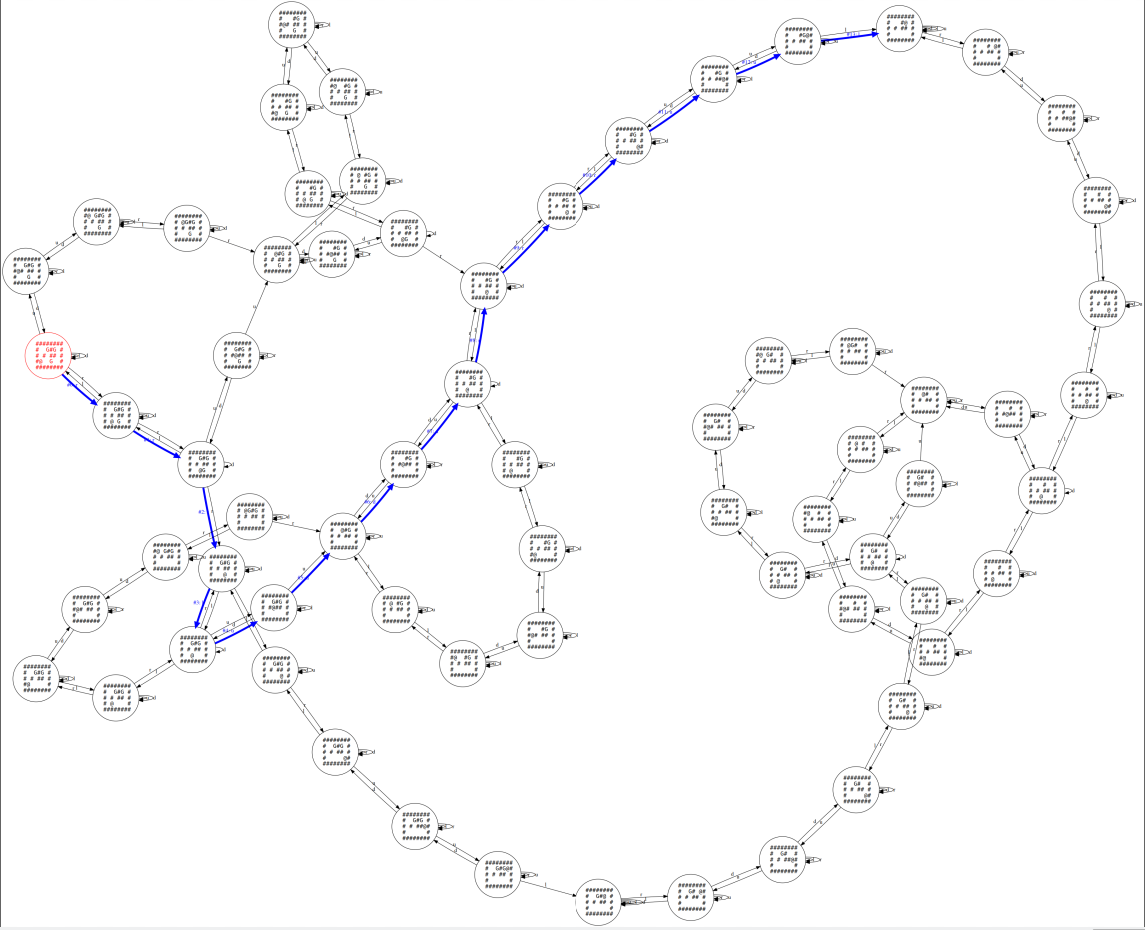